# Assignment 1

by Yaroslava Lochman

## Problem 1: Descriptive Statistics and Probability Theory: Real Data on CEO Compensation

In [274]:
import numpy as np
import pandas as pd
from scipy.stats import trim_mean
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings('ignore')

ceo = pd.read_excel("data/ceo.xls")
num_observations = len(ceo)
salary = ceo.salary
ceo.head()

,salary,totcomp,tenure,age,sales,profits,assets,Unnamed: 7
0,3030,8138,7,61,161315.0,2956.0,257389.0,NaN
1,6050,14530,0,51,144416.0,22071.0,237545.0,NaN
2,3571,7433,11,63,139208.0,4430.0,49271.0,NaN
3,3300,13464,6,60,100697.0,6370.0,92630.0,NaN
4,10000,68285,18,63,100469.0,9296.0,355935.0,NaN


# 1
In the pre-reading you/we have discussed tools and methods for
visualizing data and computing some simple characteristic measures.
Our aim here is to apply all the basic techniques and to draw correct
conclusions. The ﬁle ceo.xls contains data on the CEO compensations
and some additional variables listed below
```
salary  = 1999 salary + bonuses in 1000 USD
totcomp = 1999 CEO total compensation
tenure  = # of years as CEO (=0 if less than 6 months)
age     = age of CEO
sales   = total 1998 sales revenue of firm i
profits = 1998 profits for firm i
assets  = total assets of firm i in 1998
```
Our aim is to evaluate the data set with basic tools.

## 1.a
For the variable salary compute the common location measures:
- [x] mean
- [x] 10%trimmed mean
- [x] median
- [x] upper and lower quartiles
- [x] the upper and lower 10%quantiles.
- [x] Give an economic interpretation for every location measure.

In [275]:
def p_quantile(x, p):
    from math import floor
    """
    0 <= p <= 1
    """
    x = sorted(x)
    n = len(x)
    
    m = n * p
    if m % 1 == 0:
        m = int(m)
        return (x[m-1] + x[m]) / 2
    else:
        return x[int(floor(m))]
    
def p_quantile_pandas(x, p):
    from math import floor
    """
    0 <= p <= 1
    """
    x = sorted(x)
    n = len(x)
    
    m = (n - 1) * p
    print('(n-1)p = {}'.format(m))
    if m % 1 != 0:
        m = int(m)
        return (x[m] + x[m+1]) / 2
    else:
        return x[int(m)]

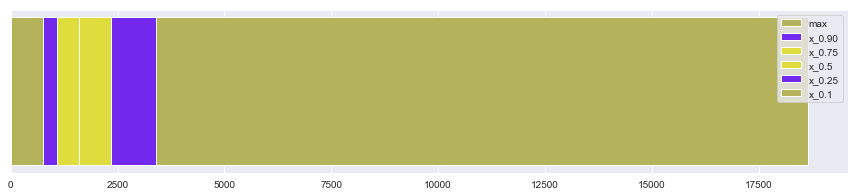

minimum value: 100 | maximum value: 15250
mean:			 2027.52
	 as the only location measure it tells a few about a distribution, 
       in terms of economics it allows roughly compare salaries of CEOs 
       with some other positions, but it should be used with other measures 
       (described below) if we want to analyse salaries in details.

10%-trimmed mean:	 1710.09
	 10 % of salaries extreme values are reduced and the mean is 
       significantly diminished reflecting some concentration of very 
       big salary values (there should be either a gap between these big 
       and less salaries or a sparse allocation of salaries-outliers on big 
       scales).

median:			 1600.00
	 this value is close to the 10%-trimmed mean and since the 
       two measures are robust to outliers we can conclude that the 
       `center` of salaries is near 1600-1710.

lower quartile:		 1083.00
upper quartile:		 2350.00
	 the quartiles are almost equidistant from the `center` described 
       

In [276]:
median = salary.median()
trimmean = trim_mean(salary, 0.1)
q25 = p_quantile(salary, .25) # salary.quantile(.25, interpolation='midpoint')
q75 = p_quantile(salary, .75) # salary.quantile(.75, interpolation='midpoint')
q10 = p_quantile(salary, .1)  # salary.quantile(.1, interpolation='midpoint'))
q90 = p_quantile(salary, .9)  # salary.quantile(.9, interpolation='midpoint'))
IQR = q75 - q25
# lower_fence = q25 - 1.5 * IQR
# upper_fence = q75 + 1.5 * IQR

# visualize quantiles
mpl.rcParams['figure.figsize'] = (15,3)

def rc():
    return '#{:02X}{:02X}{:02X}'.format(*np.random.randint(0,255,3))

# quantiles_names = ['lower 10%', 'lower (25%)', 'median', 'upper (75%)', 'upper 10% (90%)']
quantiles_names = ['x_0.1', 'x_0.25', 'x_0.5', 'x_0.75', 'x_0.90', 'max']
quantiles = [q10, q25, median, q75, q90, salary.max()]
ind = np.arange(1)
n = len(quantiles)
colors = [rc(), rc(), rc()]
colors.extend(colors[::-1])
p = [0] * n

for i, q in enumerate(quantiles):
    if i == 0:
        p[i] = plt.barh(ind, (q), color=colors[i])
    else:
        p[i] = plt.barh(ind, (q), color=colors[i], left=(quantiles[i-1]))

plt.yticks([])
plt.title('')
plt.legend([p_[0] for p_ in p][::-1], quantiles_names[::-1], loc='upper right')
plt.show()

print('minimum value: {} | maximum value: {}'.format(salary.min(), salary.max()))
print('mean:\t\t\t {:.2f}'.format(salary.mean()))
print('\t as the only location measure it tells a few about a distribution, \n\
       in terms of economics it allows roughly compare salaries of CEOs \n\
       with some other positions, but it should be used with other measures \n\
       (described below) if we want to analyse salaries in details.\n')

print('10%-trimmed mean:\t {:.2f}'.format(trimmean))
print('\t 10 % of salaries extreme values are reduced and the mean is \n\
       significantly diminished reflecting some concentration of very \n\
       big salary values (there should be either a gap between these big \n\
       and less salaries or a sparse allocation of salaries-outliers on big \n\
       scales).\n')


print('median:\t\t\t {:.2f}'.format(median))
print('\t this value is close to the 10%-trimmed mean and since the \n\
       two measures are robust to outliers we can conclude that the \n\
       `center` of salaries is near {:.0f}-{:.0f}.\n'.format(median, trimmean))

print('lower quartile:\t\t {:.2f}'.format(q25))
print('upper quartile:\t\t {:.2f}'.format(q75))
print('\t the quartiles are almost equidistant from the `center` described \n\
       above (with interquartile range {:.0f}). So, the most concentration \n\
       of salaries is between {:.0f} & {:.0f}.\n'.format(IQR, q25, q75))

print('lower 10%-quantile:\t {:.2f}'.format(q10))
print('upper 10%-quantile:\t {:.2f}'.format(q90))
print('\t upper quantile is far away from the maximum salary accepting hypothesis \n\
       about the existence of outliers or very big salaries. Lower quantile \n\
       indicates that there are few/no outliers on the left side. So, usually \n\
       CEOs have salaries between {:.0f} & {:.0f}.'.format(q10, q90))

## 1.b
Plot the empirical cumulative distribution function.

- [x] Compute and explain in economic terms the following quantities
- [x] $F^{−1}(0.2)$ and $F^{−1}(0.8)$
- [x] $F(1000)$ and $1−F(5000)$

F^(-1)(0.2) = 975.00
F^(-1)(0.8) = 2615.00
	the values of the inverse ecdf or the quantiles are close to 
       quantiles described above (these are between 10% and 25%) and may 
       also represent the boundaries of the concentration of the data.
       So it is between 975 & 2615 (black points).
F(1000) = 0.217
	this means that 22% of salaries data is less than 1000.
1 - F(5000) = 0.054
	this means that 5% of salaries data is more than 5000.


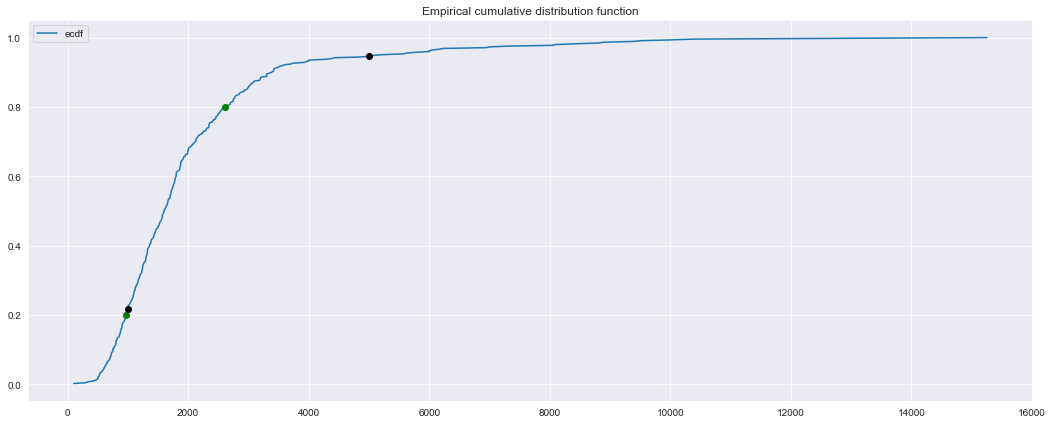

In [277]:
mpl.rcParams['figure.figsize'] = (18, 7)

from statsmodels.distributions.empirical_distribution import ECDF
cdf = ECDF(salary)
plt.plot(cdf.x, cdf.y, label='ecdf')
plt.legend()
plt.title('Empirical cumulative distribution function')


def CDF(cdf, i):
    return cdf.y[list(cdf.x).index(i)]

F_1000 = CDF(cdf, 1000)
F_5000 = CDF(cdf, 5000)

F_inverse_02 = p_quantile(salary, 0.2)
F_inverse_08 = p_quantile(salary, 0.8)

print('F^(-1)(0.2) = {:.2f}'.format(F_inverse_02))
print('F^(-1)(0.8) = {:.2f}'.format(F_inverse_08))
print('\tthe values of the inverse ecdf or the quantiles are close to \n\
       quantiles described above (these are between 10% and 25%) and may \n\
       also represent the boundaries of the concentration of the data.\n\
       So it is between {:.0f} & {:.0f} (black points).'.format(F_inverse_02, F_inverse_08))
print('F(1000) = {:.3f}'.format(F_1000))
print('\tthis means that {:.0f}% of salaries data is less than 1000.'.format(F_1000 * 100))
print('1 - F(5000) = {:.3f}'.format(1 - F_5000))
print('\tthis means that {:.0f}% of salaries data is more than 5000.'.format((1 - F_5000) * 100))
plt.plot(F_inverse_02, 0.2, 'go')
plt.plot(F_inverse_08, 0.8, 'go')
plt.plot(1000, F_1000, 'ko')
plt.plot(5000, F_5000, 'ko')
plt.show()
# bins = 100
# salary.hist(cumulative=True, density=1, bins=bins)
# plt.show()

# pdf, bin_edges = np.histogram(salary, normed=True, bins=bins)
# plt.plot(bin_edges[:-1], pdf)

## 1.c
- [x] Plot the histogram of salary and the Box-plot (or violin-plot).

Number of observations: 447


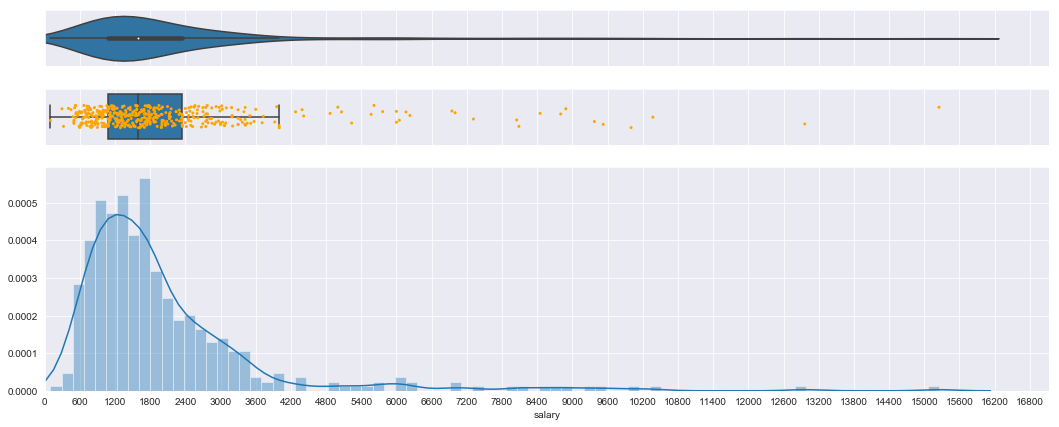

Sample skewness: 3.402 > 0 


In [278]:
def represent_distribution(sample, xmin=None, nx=None):
    mpl.rcParams['figure.figsize'] = (18, 7)

    f, (ax_viol, ax_box, ax_hist) = plt.subplots(3, sharex=True,
                                                 gridspec_kw={"height_ratios": (.15, .15, .60)})

    sns.violinplot(sample, showmeans=True, ax=ax_viol)
    ax_viol.set(xlabel='')

    sns.boxplot(sample, fliersize=0, whis=1.5, ax=ax_box)
    sns.stripplot(sample, color="orange", jitter=0.2, size=3, ax=ax_box)
    ax_box.set(xlabel='')

    sns.distplot(sample, ax=ax_hist, bins=80)
    if nx is not None:
        ax_hist.xaxis.set_major_locator(plt.MaxNLocator(nx))
    if xmin is not None:
        ax_hist.set_xlim(left=xmin)

    print('Number of observations: {}'.format(len(sample)))
    plt.show()
    
represent_distribution(salary, 0, 30)
    
salary_skew = salary.skew()
print('Sample skewness: {:.3f} {}'.format(salary_skew, '> 0 '
                                          if salary_skew > 0 else '< 0'))

- [x] What can be concluded about the distribution of the data?

> The salaries are really concentrated between 400 & 3600 and have a heaavy tail of extremely big salaries. The distribution form is similar to Chi-Square.

- [x] Are the location measures computed above still appropriate?

> In our case the mean, which is equal to 2028, is inappropriate, because of the outliers it's shifted to greater value than the real "center" of the data. 10%-trimmed mean and median (1710 and 1600 accordingly) are relatively close and represent, where the data is really concentrated. Other quantiles also give a useful information about the location of data (10% upper and lower quantiles are close to the data concantraion boundaries; the same with quartiles but with aa very high concentration).

- [x] Compute and discuss an appropriate measure of symmetry.

> The sample skewness is equal  to $3.4 \geq 0$ meaning that the distribution is right-skewed which is clear from the representation below (the peak is shifted to the left part). One can interpret it as (since there are more CEOs with salary a little less than the peak than CEOs with salary more than the peak) some factors preventing from getting a larger salary after achieving the median may exist, and it's getting stronger with moving the salary forward.

## 1.d
- [x] Check which method is used in your software to compute the optimal bandwidth (or the number of bars) in the histogram.

For the `fd` method the optimal bandwidth is 46. Histogram:


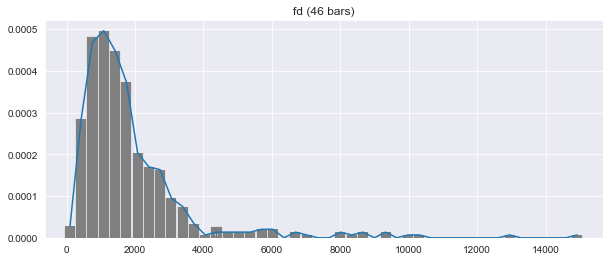

For the `sturges` method the optimal bandwidth is 10. Histogram:


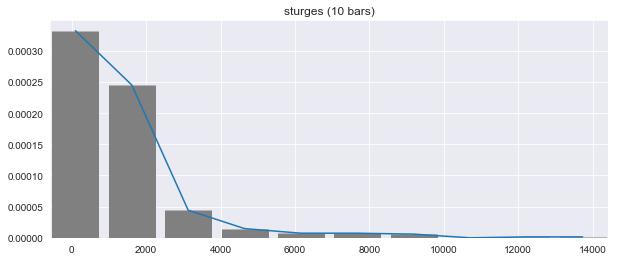

For the `doane` method the optimal bandwidth is 15. Histogram:


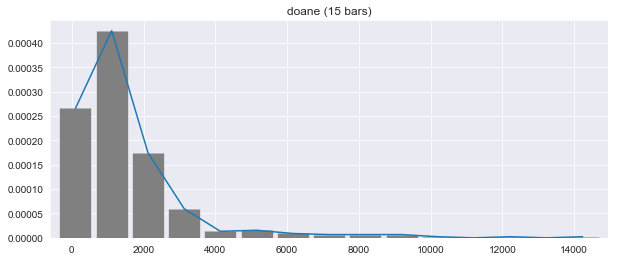

For the `scott` method the optimal bandwidth is 20. Histogram:


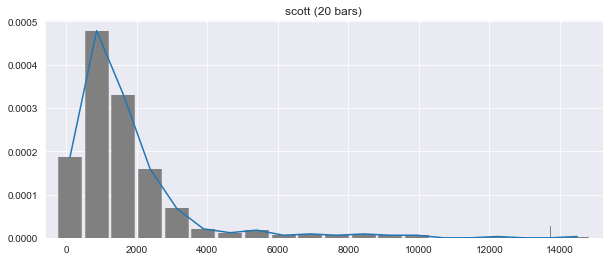

For the `rice` method the optimal bandwidth is 16. Histogram:


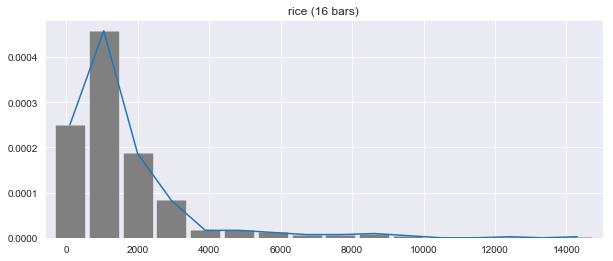

For the `sqrt` method the optimal bandwidth is 22. Histogram:


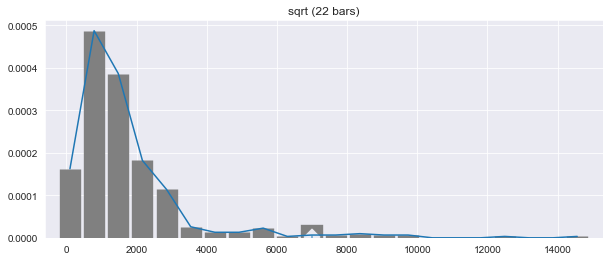

Bandwidth = 500. Histogram:


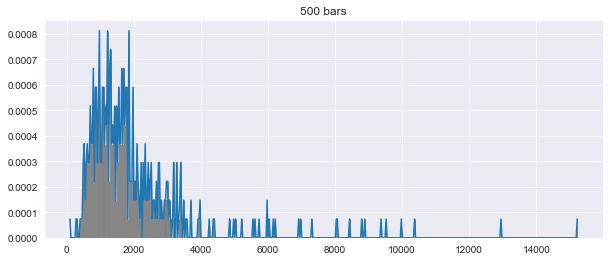

Bandwidth = 8. Histogram:


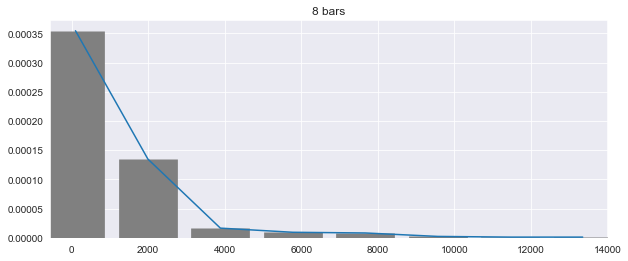

Bandwidth = 30. Histogram:


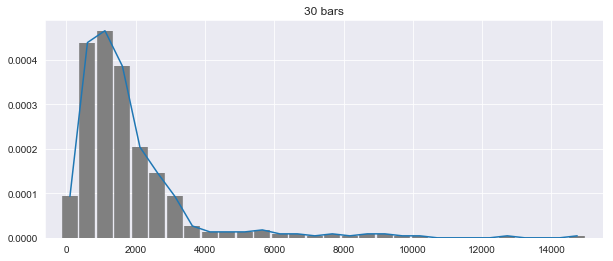

In [279]:
mpl.rcParams['figure.figsize'] = (10, 4)
for bins in ['fd', 'sturges', 'doane', 'scott', 'rice', 'sqrt',
             500, 8, 30]:
    plt.title(bins)
    pdf, bin_edges = np.histogram(salary, normed=True, bins=bins)
    n_bins = len(bin_edges) - 1
    if isinstance(bins, int):
        print('Bandwidth = {}. Histogram:'.format(bins))
        plt.title('{} bars'.format(n_bins))
    else:
        print('For the `{}` method the optimal bandwidth is {}. Histogram:'.format(bins, n_bins))
        plt.title('{} ({} bars)'.format(bins, n_bins))
    plt.plot(bin_edges[:-1], pdf)
    plt.bar(bin_edges[:-1], pdf, linewidth=10*47/n_bins, edgecolor='gray')
    plt.show()

- [x] Describe it shortly here. Make plots of too detailed and too rough histograms. What can we learn from these ﬁgures?

> In numpy there are 6 methods ('fd': 46, 'sturges': 10, 'doane': 15, 'scott': 20, 'rice': 16, 'sqrt': 22) and 1 auto which just chooses maximum of 'sturges' and 'fd'. In my opinion the optimal bandwidth should be something between 22, defined by 'sqrt' method (square root of data size) and 46, defined by 'fd' method (Robust Freedman Diaconis estimator which takes into account data variability and data size), e.g. 30 -- it is neither too detailed nor too rough.

> For too detailed histogram I took the bandwidth = 500. With such "detailed" view the sense of the distribution is lost. The relative frequency of very small groups (or unique values) won't give us the useful information due to the restricted sample size and the sample basically (in the real world it will never be ideally representative).

> For too rough histogram I took the bandwidth = 8. It accumulates too much information in one, meaning that the ranges of bins are so big that we are getting a really rough picture.

## 1.e
There are methods which help us make the distribution of the sample more symmetric. Consider the natural logarithm of the salary: ln(salary).
- [x] Plot the histogram (and Box-plot) and compare it with the ﬁgures for original data.
- [x] Compute the mean and the median.

Number of observations: 447


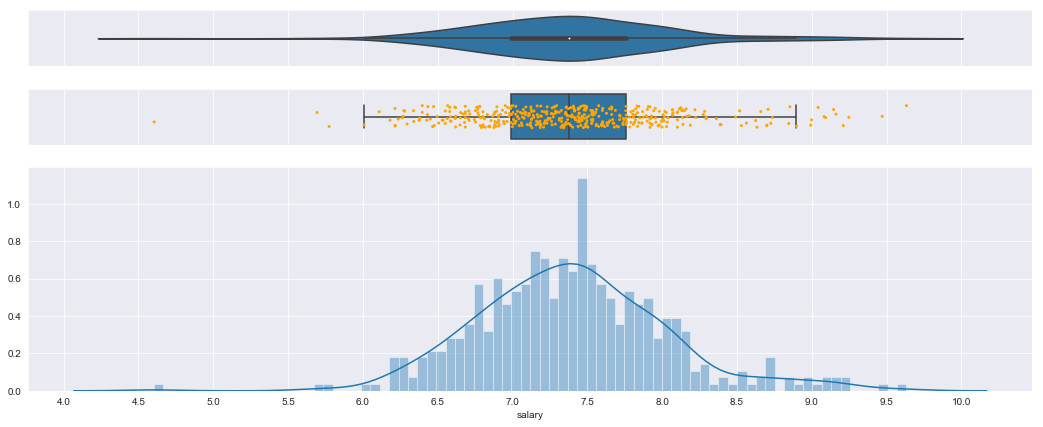

Sample skewness: 0.306 > 0 
mean:	 7.39
median:	 7.38


In [280]:
salary_ln = np.log(salary)
represent_distribution(salary_ln, nx=15)

salary_skew = salary_ln.skew()
print('Sample skewness: {:.3f} {}'.format(salary_skew, '> 0 '
                                          if salary_skew > 0 else '< 0'))
print('mean:\t {:.2f}'.format(salary_ln.mean()))
print('median:\t {:.2f}'.format(salary_ln.median()))

- [x] What can be concluded from the new values. Provide economic interpretation.

> The mean and the median are now very close and represent where the $\ln(salary)$ data is concentrated. The logarithm function helps to reduce tails and somewhat smoothen the distribution, so we can focus on the characteristics of the distribution.

# 2 
## 2.a
We suspect that the salary of the CEO and other variables are related.
- [x] Compute the correlation coeﬃcients of Pearson and plot them as a heatmap (correlation map).
- [x] Discuss the strength of the correlations.

> From the correlation map we can see that the salary in 1999 may be related with assets, sales and profits in 1998, and with total compensation since their values are close to 0.5 (considering salary as an obligatory variable of the two). The number of years as a CEO and age should not be related to salary since their coefficients are close to zero. 

> Regarding the full table of relations, one should notice the correlation coefficient 0.73 for sales and profits that tells us about very possible dependency between these two variables. Also with coefficients close to 0.5 there may be a relation between assets and sales & profits.

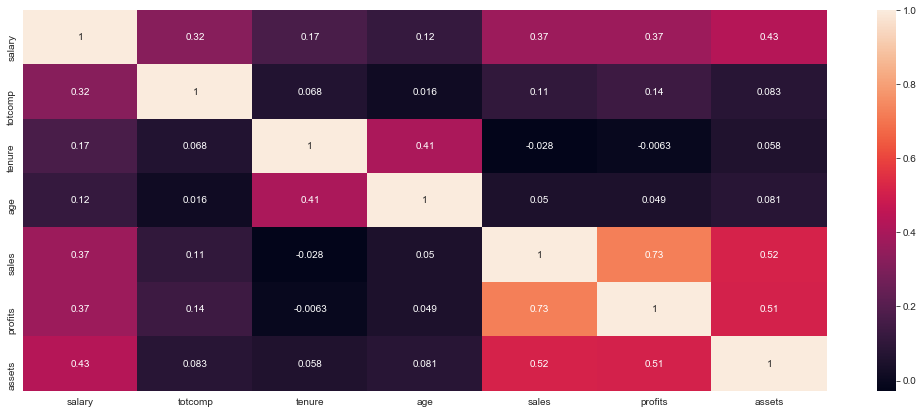

In [281]:
sns.heatmap(ceo.corr('pearson'), annot=True)
plt.show()

## 2.b
- [x] Plot the scatter plots.

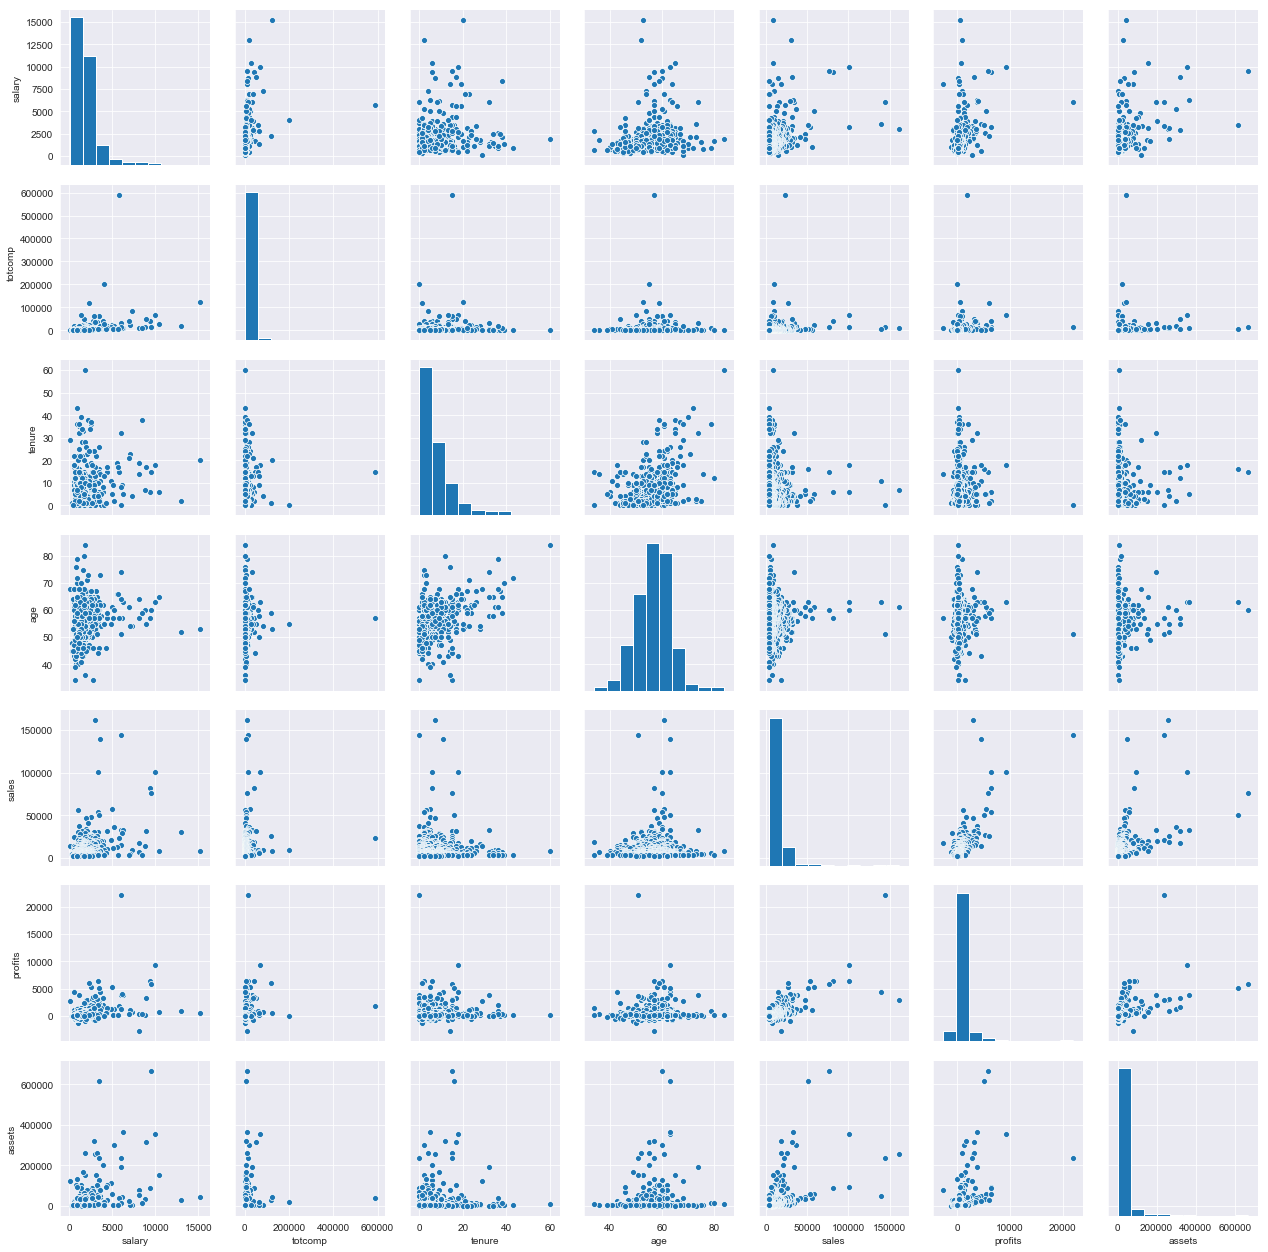

In [282]:
sns.pairplot(ceo)
plt.show()

- [x] Conclude if the linear correlation coeﬃcients are appropriate here.

> The scatter plots shows that the linear correlation is not approriate in this case, the relations mostly either very complex or absent at all. The only correlation, that can have linear component, is between sales and profits (for smaller values it is better observed) therefore in this case the linear correlation coeﬃcient may be appropriate. In other cases it's not.

- [x] Compute now the Spearman’s correlations and make a heatmap.

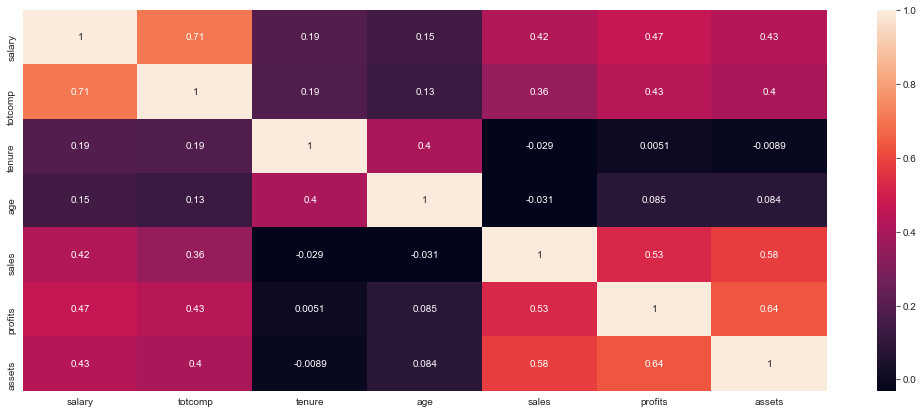

The rank of the observation salary=6000 is 373


In [283]:
sns.heatmap(ceo.corr('spearman'), annot=True)
plt.show()
z = sorted(set(list(salary)))
print('The rank of the observation salary=6000 is {}'.format(dict(zip(z, range(len(z))))[6000]))

- [x] Compare the results with Pearson.

> There are several significant differences: the salary in 1999 are very correlated with total compensation (corr. coef. = 0.71, by Spearman) and more correlated with sales & profits; the correlation between total compensation and all the other variables is stronger (especially with assets); profits and sales are less correlated; profits and assets are more correlated.

- [x] What is the rank of the observation $salary=6000$?

> 373

## 2.c
Consider the two subsamples: CEOs younger than 50 and older than 50.
- [x] Plot for both subsamples overlapping histograms/ecdf’s and discuss the results.

observations for < 50:		   62.00 | observations for > 50:		  369.00
min-max for < 50:	 297.00 - 4280.00| min-max for > 50:		 100.00 - 15250.00
mean for < 50:			 1406.55 | mean for > 50:			 2157.34
10%-trimmed mean for < 50:	 1311.56 | 10%-trimmed mean for > 50:		 1801.00
median for < 50:		 1321.00 | median for > 50:			 1675.00
dispersion for < 50:		 805.55  | dispersion for > 50:  		 1838.61


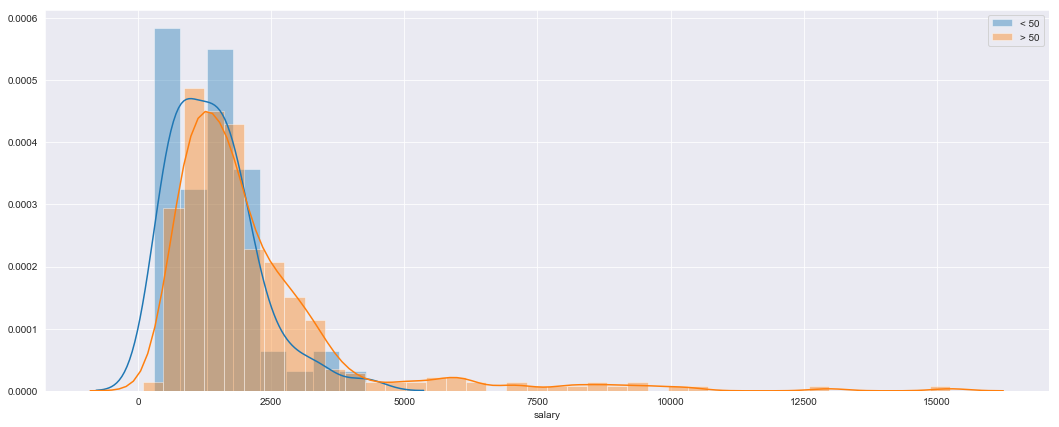

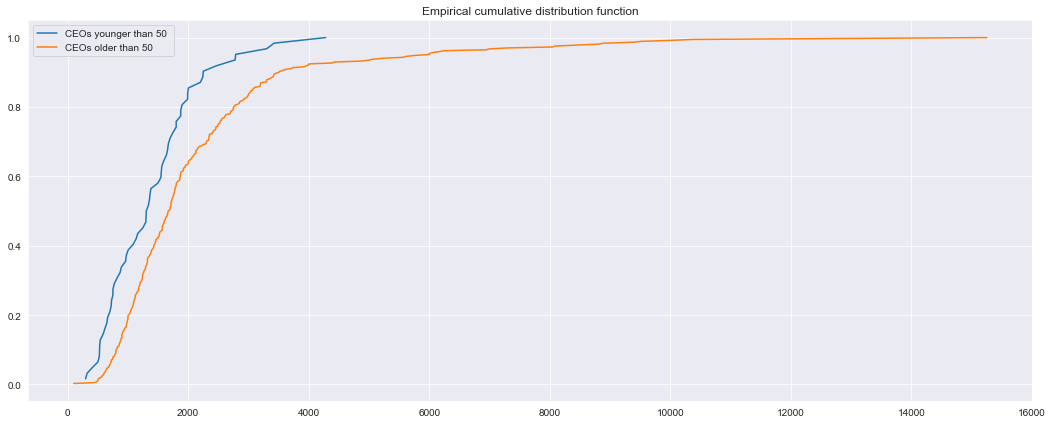

In [284]:
salary_younger50 = ceo[ceo.age<50].salary
salary_older50 = ceo[ceo.age>50].salary
print('observations for < 50:\t\t   {:.2f} | \
observations for > 50:\t\t  {:.2f}'.format(len(salary_younger50), len(salary_older50)))
print('min-max for < 50:\t {:.2f} - {:.2f}| \
min-max for > 50:\t\t {:.2f} - {:.2f}'.format(salary_younger50.min(), salary_younger50.max(),
                                       salary_older50.min(), salary_older50.max()))
print('mean for < 50:\t\t\t {:.2f} | \
mean for > 50:\t\t\t {:.2f}'.format(salary_younger50.mean(), salary_older50.mean()))
print('10%-trimmed mean for < 50:\t {:.2f} | \
10%-trimmed mean for > 50:\t\t {:.2f}'.format(trim_mean(salary_younger50, 0.1), trim_mean(salary_older50, 0.1)))
print('median for < 50:\t\t {:.2f} | \
median for > 50:\t\t\t {:.2f}'.format(salary_younger50.median(), salary_older50.median()))
print('dispersion for < 50:\t\t {:.2f}  | \
dispersion for > 50:  \t\t {:.2f}'.format(salary_younger50.std(), salary_older50.std()))
sns.distplot(salary_younger50)
sns.distplot(salary_older50)
plt.legend(['< 50', '> 50'])
plt.show()

cdf = ECDF(salary_younger50)
plt.plot(cdf.x, cdf.y, label='CEOs younger than 50 ')
cdf = ECDF(salary_older50)
plt.plot(cdf.x, cdf.y, label='CEOs older than 50 ')
plt.legend()
plt.title('Empirical cumulative distribution function')
plt.show()

- [x] What can we learn from the corresponding location and dispersion (!) measures?

> For CEOs older than 50 salaries are much more volatilized than for younger ones. Most of the outliers are those CEOs older than 50 and the tail of bigger salaries for them is much heavier therefore the mean is highly shifted towards greater values and dispersion is much larger than for CEOs younger than 50. But for these younger CEOs the bigger concentration of values near the median and absence of outliers may be not correct due to the much smaller number of observations.

# 3 

Consider another grouping of the data.
Deﬁne the groups:
```
S1 if salary < 2000
S2 if salary ≥ 2000 but < 4000
S3 if salary ≥ 4000

A1 if age < 50
A2 if age ≥ 50
```

In [285]:
ceo["S"] = list(map(lambda x: 1 if x < 2000 else 2 if x < 4000 else 3, ceo.salary))
ceo["A"] = list(map(lambda x: 1 if x < 50 else 2, ceo.age))

## 3.a
- [x] Aggregate the data to a 2×3 contigency table with absolute and with relative frequencies.

In [286]:
contingency_table = pd.crosstab(ceo.A, ceo.S)
short_contingency_table = contingency_table.copy()
contingency_table['marginal'] = contingency_table.aggregate('sum', 1)
contingency_table = contingency_table.append(pd.Series(dict(zip([1,2,3,'marginal'],
                                                                contingency_table.aggregate('sum'))),
                                                      name='marginal'))
relative_contingency_table = contingency_table / num_observations

In [287]:
contingency_table

S,1,2,3,marginal
A,,,,
1,52,9,1,62
2,248,107,30,385
marginal,300,116,31,447


In [288]:
relative_contingency_table

S,1,2,3,marginal
A,,,,
1,0.116331,0.020134,0.002237,0.138702
2,0.554810,0.239374,0.067114,0.861298
marginal,0.671141,0.259508,0.069351,1.000000


## 3.b
- [x] Give interpretation for the values of $n_{12}$ , $h_{12}$ , $n_{1\cdot}$ and $h_{1\cdot}$.

> $n_{12} = 9$ of 447 CEOs ( relatively $h_{12} = 0.020$ or $2\%$ of all ) are younger than 50 having salary between 2000 & 4000. It is one the least groups among aggregated. 

> $n_{1\cdot} = 62$  of 447 CEOs ( relatively $h_{1\cdot} = 0.139$ or $14\%$ of all) are younger than 50. This age group is relatively small and not very representative.

## 3.c
- [x] Compute an appropriate dependence measure for $S_i$ and $A_j$.

In [294]:
def compute_chi2(contingency_table):
    arr = np.array(contingency_table)
    num_observations = arr.sum()
    n, m = arr.shape
    s = 0
    for i in range(n):
        for j in range(m):
            n_ij = arr[i, j]
            n_i = arr[i,:].sum()
            n_j = arr[:,j].sum()
            s += ((n_ij - n_i * n_j / num_observations) ** 2) / (n_i * n_j / num_observations)     
    return s

def cont_coef_pearson(contingency_table):
    """Corrected contingency coeﬃcient of Pearson
    """
    chi2 = compute_chi2(contingency_table)
    min_kl = min(contingency_table.shape)
    C_max = np.sqrt((min_kl - 1) / min_kl)
    C = np.sqrt(chi2 / (chi2 + num_observations))
    C_corr = C / C_max
    return C_corr

In [293]:
#import scipy.stats as st
# chi2, p, dof, expected = st.chi2_contingency(short_contingency_table)
# print(chi2, p, dof)
# print('p = {:.3f} {}'.format(p, '> 0.05 ' if p > 0.05 else '< 0.05'))

coef = cont_coef_pearson(short_contingency_table)
print('Corrected contingency coeﬃcient of Pearson = {:.4f}'.format(coef))

Corrected contingency coeﬃcient of Pearson = 0.2048


- [x] What can be concluded from its value?

> Since the corrected contingency coeﬃcient of Pearson $\in [0,1]$, we have the value closer to zero indicating "weak" dependence between variables S & A. So we didn't notice significant correlation between two age groups and three salary groups. Perhaps, the other aggregating method would help find strong relations.